In [1]:
%pylab inline
import pandas as pd

import plotnine as p

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

p.theme_set(p.theme_classic())

Populating the interactive namespace from numpy and matplotlib


C:\Users\vale\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(5, whiten=True)

In [4]:
from scipy import stats

In [5]:
G = 100
S = np.eye(G) * 1
mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 0

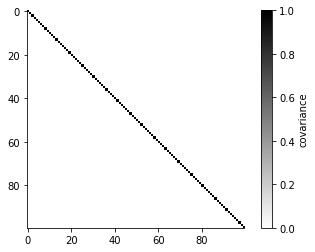

In [6]:
plt.imshow(S, cmap=cm.gray_r);
plt.colorbar(label='covariance')

In [7]:
def make_data(mu1, mu2, S1, S2, N=300):
    samples1 = stats.multivariate_normal(mu1, S1).rvs(N)
    samples2 = stats.multivariate_normal(mu2, S2).rvs(N)

    data = np.vstack((samples1, samples2))
    
    return data

In [8]:
data = make_data(mu1, mu2, S, S)

In [9]:
def plot_data(data):
    figsize(8, 4)
    plt.pcolormesh(data.T, cmap=cm.gray_r);
    plt.ylabel('Genes')
    plt.xlabel('Cells');
    plt.colorbar(label='expression');

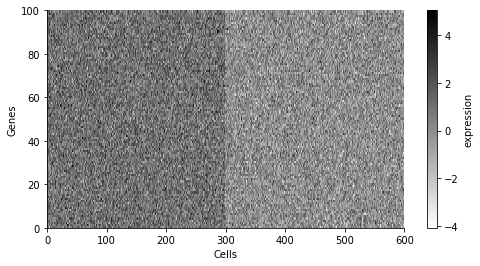

In [10]:
plot_data(data)

In [11]:
def pca_wrapper(data, return_df=False):
    Y = pca.fit_transform(data)
    df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
    df['row'] = df.index
    df['cell type'] = (df['row'] >= 300).map({True: 'A', False: 'B'})
    
    plot = p.ggplot(df, p.aes('PC1', 'PC2')) \
    + p.geom_point(p.aes(fill='cell type'), size=2.5) \
    + p.scale_fill_grey(0, 1)
    
    if return_df:
        return df, plot
    
    return plot

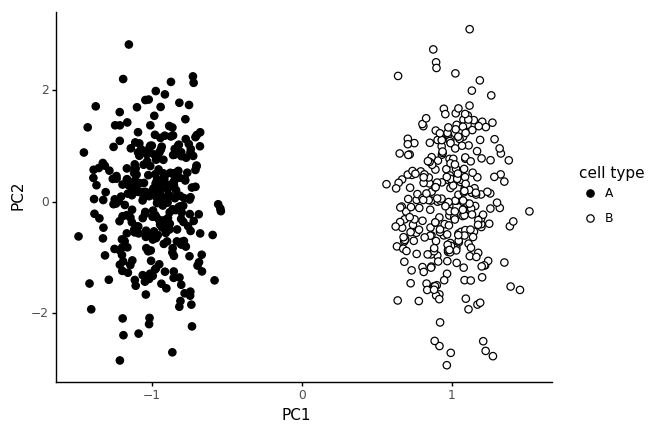

<ggplot: (115276487716)>

In [12]:
pca_wrapper(data)

In [45]:
F_G = 20

S = np.eye(G) * 1

mu1 = np.zeros(G)
mu1[:F_G] = 1.
mu2 = np.zeros(G)
mu2[G - F_G:] = 1.


In [46]:
data = make_data(mu1, mu2, S, S)

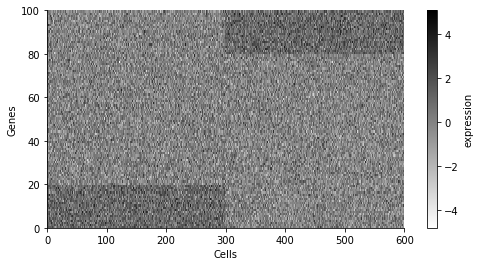

In [47]:
plot_data(data)

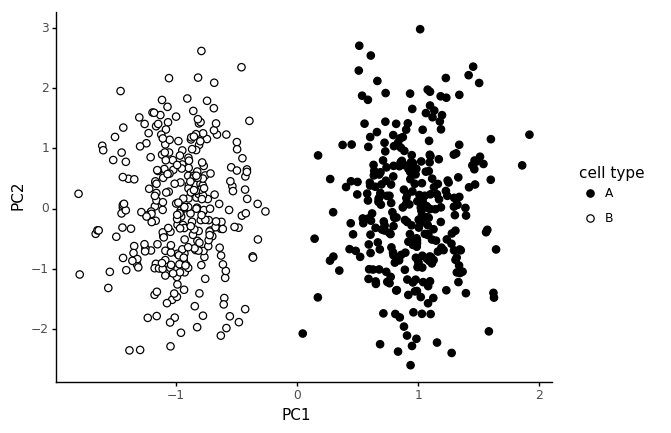

<ggplot: (-9223371921578039871)>

In [49]:
pca_wrapper(data)

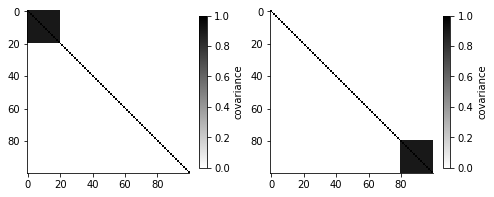

In [31]:
A = np.zeros((F_G, F_G))
O = np.zeros((G - F_G, G - F_G))
O_R = np.zeros((F_G, G - F_G))

ATA = A + 0.9

S1 = np.bmat([[ATA, O_R], [O_R.T, O]])
np.fill_diagonal(S1, 1)

S2 = np.bmat([[O, O_R.T], [O_R, ATA]])
np.fill_diagonal(S2, 1)

mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 1

plt.subplot(1, 2, 1)
plt.imshow(S1, cmap=cm.gray_r);
plt.colorbar(label='covariance', shrink=0.7)
plt.subplot(1, 2, 2)
plt.imshow(S2, cmap=cm.gray_r);
plt.colorbar(label='covariance', shrink=0.7)

In [32]:
data = make_data(mu1, mu2, S1, S2)

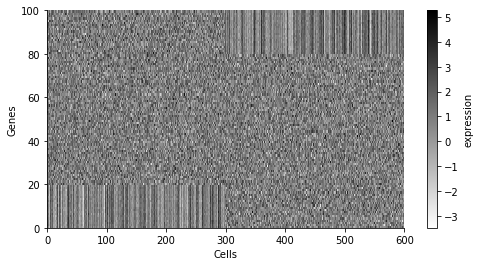

In [33]:
plot_data(data)

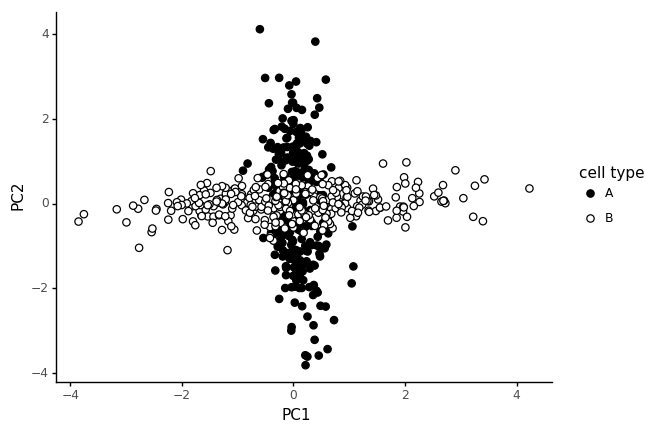

<ggplot: (-9223371921578210381)>

In [34]:
pca_wrapper(data)

In [35]:
mu1 = np.hstack((np.ones(F_G) * 1, np.ones(G - F_G) * 0))
mu2 = np.hstack((np.ones(G - F_G) * 0, np.ones(F_G) * 1))

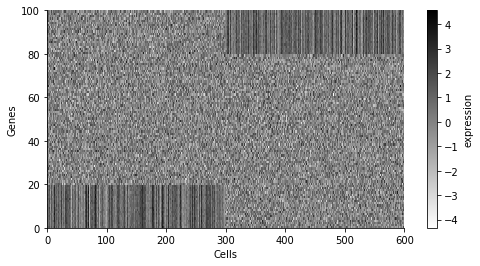

In [36]:
data = make_data(mu1, mu2, S1, S2)
plot_data(data)

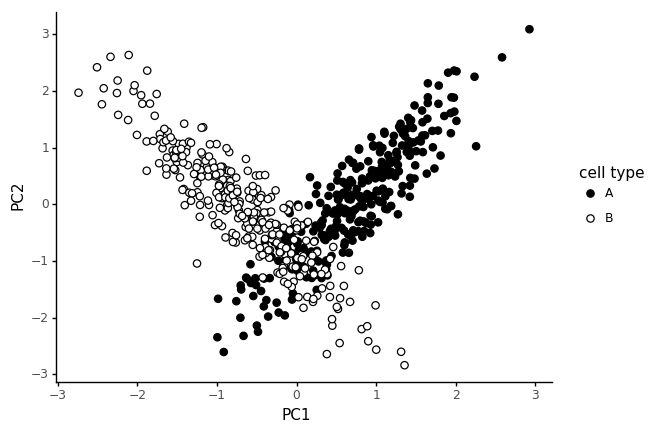

<ggplot: (-9223371921578217440)>

In [37]:
pca_wrapper(data)

In [38]:
mu1 = np.hstack((np.ones(F_G) * 1, np.ones(G - F_G) * 0))
mu2 = np.hstack((np.ones(G - F_G) * 0, np.ones(F_G) * 1))
mu1 += 1

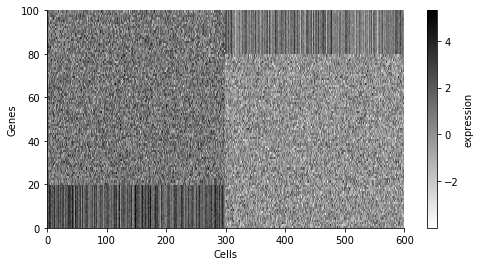

In [39]:
data = make_data(mu1, mu2, S1, S2)
plot_data(data)

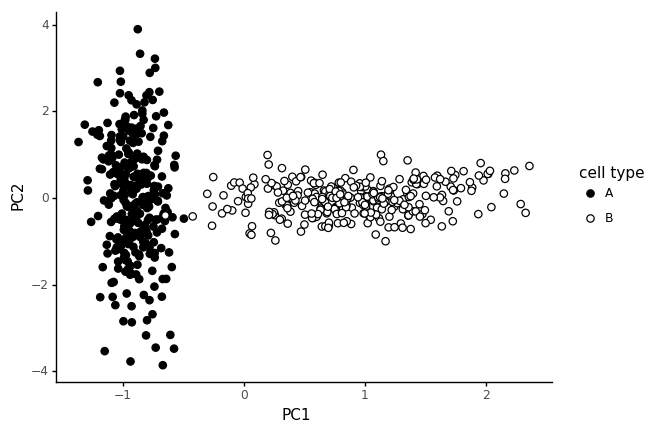

<ggplot: (115276825783)>

In [40]:
pca_wrapper(data)

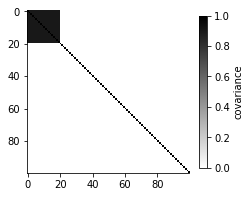

In [50]:
A = np.zeros((F_G, F_G))
O = np.zeros((G - F_G, G - F_G))
O_R = np.zeros((F_G, G - F_G))

ATA = A + 0.9

S1 = np.bmat([[ATA, O_R], [O_R.T, O]])
np.fill_diagonal(S1, 1)

S2 = np.bmat([[ATA, O_R], [O_R.T, O]])
np.fill_diagonal(S2, 1)

mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 1

plt.subplot(1, 2, 1)
plt.imshow(S1, cmap=cm.gray_r);
plt.colorbar(label='covariance', shrink=0.7)

In [62]:
mu1 = np.hstack((np.ones(F_G) * 1, np.ones(G - F_G) * 0))
mu2 = np.hstack((np.ones(F_G) * -1, np.ones(G - F_G) * 0))
mu2[:int(F_G / 2)] = 1

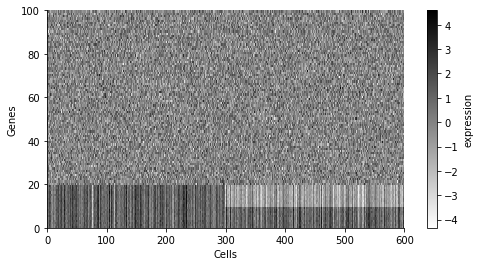

In [63]:
data = make_data(mu1, mu2, S1, S1)
plot_data(data)

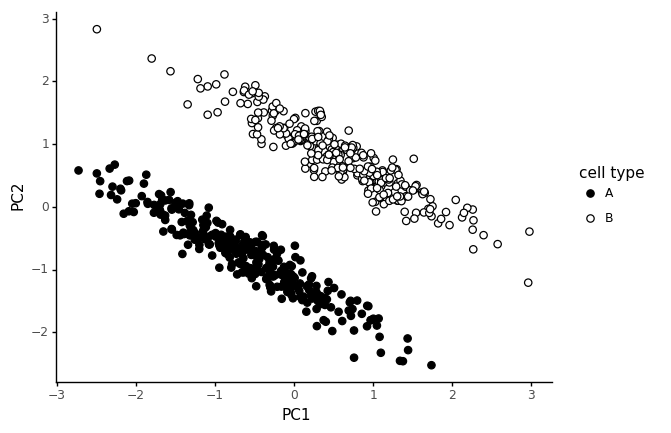

<ggplot: (115276895040)>

In [64]:
pca_wrapper(data)